# Final Project: predicting movies' box office

For this final project, we're giving you a dataset that represents movie information for 3000 movies. The goal is to predict the revenue that a movie will collect, a.k.a. the box office. To do so, you'll have to follow the process we've seen in class:

### 1. Exploratory Data Analysis

__1.1__ Take a look at the variables, which ones are continuous? which ones are categorical? Plot their distributions. Explain what you see. Do you see anything interesting? Anything that you can use later on when processing the data?

__1.2__ What variables are most correlated with revenue? Generate some plots to understand the relationship. Generate a correlation matrix. Explain what you see and what implications it has for the modelling task.

### 2. Data processing
__2.1__ You will have to process some of the columns to extract features for the modelling task. At least, you should be able to extract some useful features from the release date and the original language.

__2.2__ (Optional) Can you extract some features from those more complex columns, such as cast or crew?
Remember to analyse the distribution of the generated features.

__2.3__ Some features have missing values. You'll have to deal with them and explain how you've done it and what could be the limitations of your method.

### 3. Modelling
__3.1__ Build a baseline model that you can compare more complex models against. Generate predictions on a test set and compute the _mean_absolute_error_. Interpret the result.

__3.2__ Build a more complex model. Generate predictions on a test set and compute the _mean_absolute_error_ . Interpret the result and compare it against the previous one. How would you improve the model? Do you see any limitations to your model?

__3.3__ For your final model, analyse the importance of your variables. What do you see?



In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
data = pd.read_csv("FILMS JAVier.csv")

In [60]:
# check the first two rows
data.head(2)

title    budget original_language  \
0                    Hot Tub Time Machine 2  14000000                en   
1  The Princess Diaries 2: Royal Engagement  40000000                en   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   

                                production_companies release_date  runtime  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...      2/20/15     93.0   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]       8/6/04    113.0   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   

                                                crew   revenue main_genre  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651     Comedy   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435     Comedy   

   num_genres  num_production_countries   main_production_country  
0         1.0                       1.0  United States of America  
1         4.0                       1.0  United States of America

### 1. Exploratory Data Analysis

- 1.1 Take a look at the variables, which ones are continuous? (budget, revenue etc..) which ones are categorical? (original_language, main_genere etc..)


- Plot their distributions. Explain what you see. Do you see anything interesting? Anything that you can use later on when processing the data?

In [61]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     2996 non-null   object 
 1   budget                    2996 non-null   int64  
 2   original_language         2996 non-null   object 
 3   original_title            2996 non-null   object 
 4   production_companies      2843 non-null   object 
 5   release_date              2996 non-null   object 
 6   runtime                   2994 non-null   float64
 7   Keywords                  2721 non-null   object 
 8   cast                      2983 non-null   object 
 9   crew                      2980 non-null   object 
 10  revenue                   2996 non-null   int64  
 11  main_genre                2989 non-null   object 
 12  num_genres                2989 non-null   float64
 13  num_production_countries  2942 non-null   float64
 14  main_pro

In [62]:
# check for missing data and display how many missing values are there for each column
for i in data.columns: 
    print(i, data[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 2
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54


#### Plot the continous variables like revenue and budget

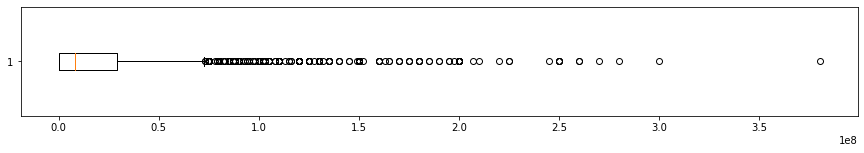

In [63]:
plt.figure(figsize = (15, 2))
plt.boxplot(data['budget'], vert = False)
plt.show()

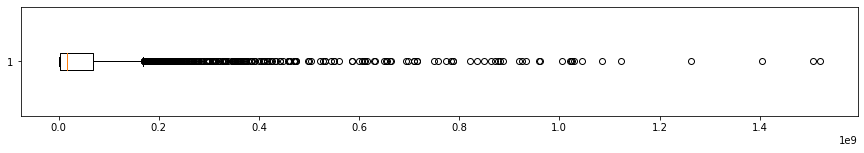

In [64]:
plt.figure(figsize = (15, 2))
plt.boxplot(data['revenue'], vert = False)
plt.show()

#### Plot the categorical variables like original_language, and main_genere

In [65]:
num_genres = data.main_genre.value_counts()
num_genres.values

array([784, 603, 520, 187, 170, 147, 116,  76,  70,  67,  67,  41,  36,
        33,  20,  20,  16,  13,   2,   1], dtype=int64)

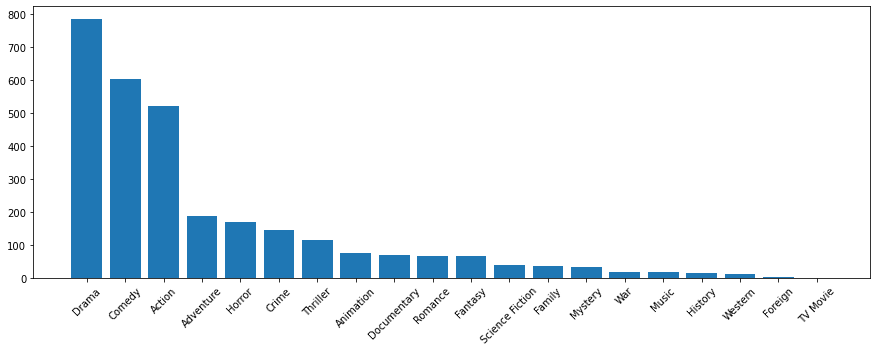

In [66]:
plt.figure(figsize = (15, 5))
plt.bar(num_genres.index, num_genres.values)
plt.xticks(rotation = 45)
plt.show()

In [67]:
num_lang = data['original_language'].value_counts()
num_lang.values

array([2571,   78,   47,   43,   42,   37,   24,   20,   20,   19,   18,
         16,    8,    6,    6,    5,    5,    4,    3,    3,    2,    2,
          2,    2,    2,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1], dtype=int64)

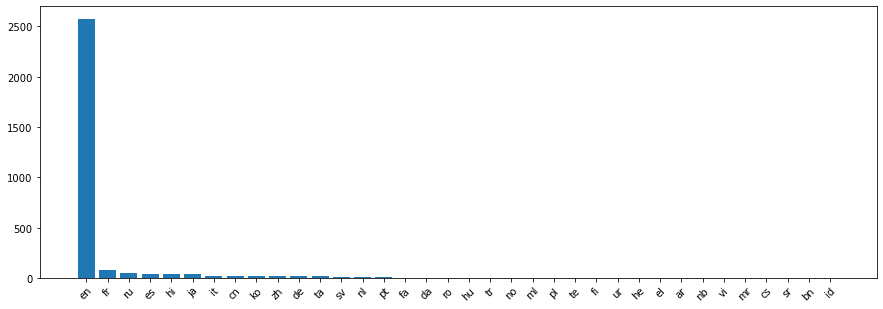

In [68]:
plt.figure(figsize = (15, 5))
plt.bar(num_lang.index, num_lang.values)
plt.xticks(rotation = 45)
plt.show()

- 1.2 What variables are most correlated with revenue? Generate some plots to understand the relationship. Generate a correlation matrix. Explain what you see and what implications it has for the modelling task.

In [69]:
# lets make a correlation pair table
data.corr()

budget   runtime   revenue  num_genres  \
budget                    1.000000  0.237665  0.752884    0.232493   
runtime                   0.237665  1.000000  0.215864    0.058269   
revenue                   0.752884  0.215864  1.000000    0.162045   
num_genres                0.232493  0.058269  0.162045    1.000000   
num_production_countries  0.105950  0.087707  0.038973    0.013442   

                          num_production_countries  
budget                                    0.105950  
runtime                                   0.087707  
revenue                                   0.038973  
num_genres                                0.013442  
num_production_countries                  1.000000

[]

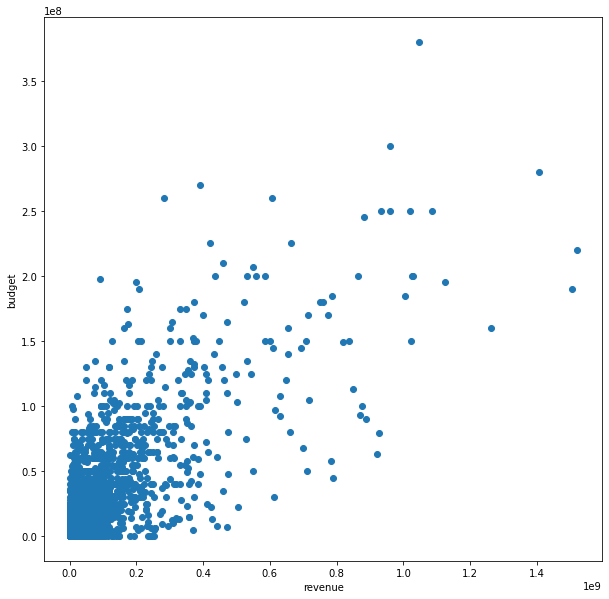

In [70]:
plt.figure(figsize = (10, 10))
plt.scatter(x = data.revenue, y = data.budget)
plt.xlabel('revenue')
plt.ylabel('budget')
plt.plot()

[]

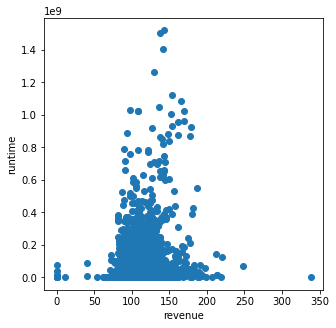

In [71]:
plt.figure(figsize = (5, 5))
plt.scatter( x = data.runtime, y = data.revenue)
plt.xlabel('revenue')
plt.ylabel('runtime')
plt.plot()

### Let's plot a pairplot graphics where we can check the correlation of each variable with all the other variables

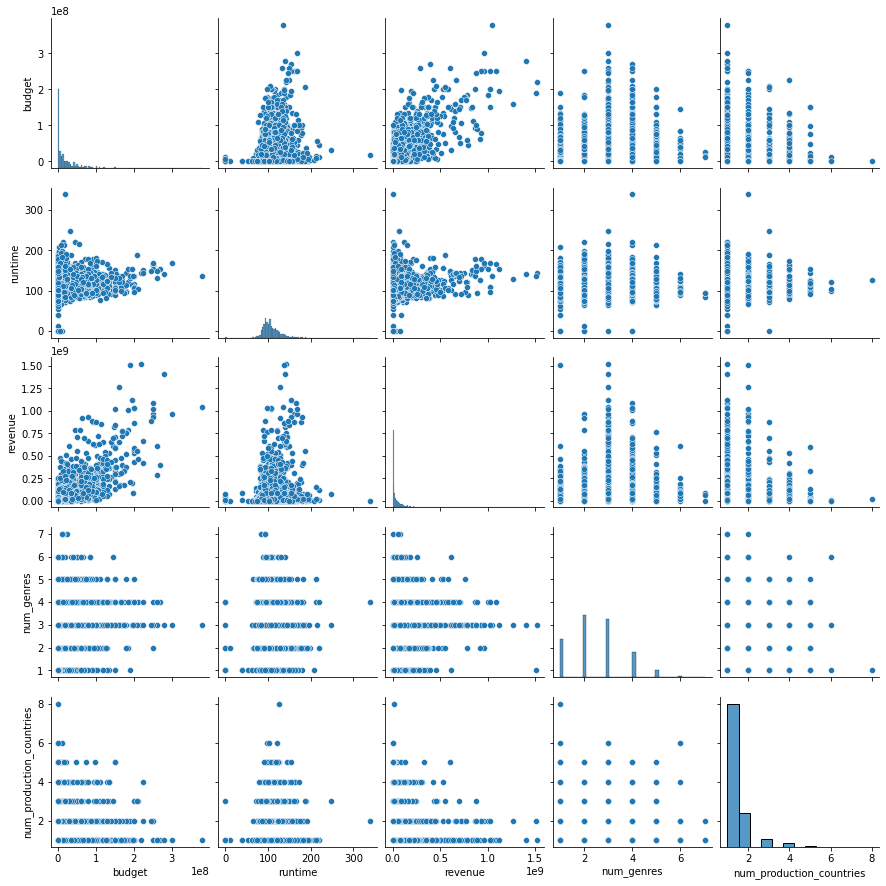

In [72]:
sns.pairplot(data)
plt.show()

### Conclusions: 

- 1 : There is a strong correlation between revenue and budget 
    
- 2 : The correlation between revenue and other variables like runtime is weak.   

- 3 : Given that there is a strong corr. between revenue and budget then the budget is a good predictor for the revenue. (good proxy)

### 2. Data processing
__2.1__ You will have to process some of the columns to extract features for the modelling task. At least, you should be able to extract some useful features from the release date and the original language.

__2.2__ (Optional) Can you extract some features from those more complex columns, such as cast or crew?
Remember to analyse the distribution of the generated features.

__2.3__ Some features have missing values. You'll have to deal with them and explain how you've done it and what could be the limitations of your method.

### Feature Extraction

In [73]:
# the weekdays go from 1-5, while the weekends 6-7
def get_dayofweek(date): 
    data = pd.Timestamp(date)
    dayofweek = date.weekday()
    return dayofweek

# the weekdays go from 1-5, while the weekends 6-7
def get_weekend(date): 
    data = pd.Timestamp(date)
    dayofweek = date.weekday()
    if dayofweek > 5: 
        return 1
    else: 
        return 0

In [74]:
# change the type of the column release_date into datetime64
data['release_date'] = pd.to_datetime(data['release_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     2996 non-null   object        
 1   budget                    2996 non-null   int64         
 2   original_language         2996 non-null   object        
 3   original_title            2996 non-null   object        
 4   production_companies      2843 non-null   object        
 5   release_date              2996 non-null   datetime64[ns]
 6   runtime                   2994 non-null   float64       
 7   Keywords                  2721 non-null   object        
 8   cast                      2983 non-null   object        
 9   crew                      2980 non-null   object        
 10  revenue                   2996 non-null   int64         
 11  main_genre                2989 non-null   object        
 12  num_genres          

In [75]:
# create a new field based on the day of week 
data['day_of_week'] = data['release_date'].apply(lambda x : get_dayofweek(x))

In [76]:
data['is_weekend'] = data['release_date'].apply(lambda x : get_weekend(x))
data

title    budget original_language  \
0                       Hot Tub Time Machine 2  14000000                en   
1     The Princess Diaries 2: Royal Engagement  40000000                en   
2                                     Whiplash   3300000                en   
3                                      Kahaani   1200000                hi   
4                                   Marine Boy         0                ko   
...                                        ...       ...               ...   
2991                                   Chasers         0                en   
2992                          We Are the Best!         0                sv   
2993                   The Long Kiss Goodnight  65000000                en   
2994                          Along Came Polly  42000000                en   
2995                                 Abduction  35000000                en   

                                original_title  \
0                       Hot Tub Time Machine 2   
1     The Princess Diaries 2: Royal Engagement   
2                                     Whiplash   
3                                      Kahaani   
4                                         마린보이   
...                                        ...   
2991                                   Chasers   
2992                               Vi är bäst!   
2993                   The Long Kiss Goodnight   
2994                          Along Came Polly   
2995                                 Abduction   

                                   production_companies release_date  runtime  \
0     [{'name': 'Paramount Pictures', 'id': 4}, {'na...   2015-02-20     93.0   
1           [{'name': 'Walt Disney Pictures', 'id': 2}]   2004-08-06    113.0   
2     [{'name': 'Bold Films', 'id': 2266}, {'name': ...   2014-10-10    105.0   
3                                                   NaN   2012-03-09    122.0   
4                                                   NaN   2009-02-05    118.0   
...                                                 ...          ...      ...   
2991  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   1994-04-22    102.0   
2992  [{'name': 'Memfis Film', 'id': 321}, {'name': ...   2013-03-28    102.0   
2993  [{'name': 'New Line Cinema', 'id': 12}, {'name...   1996-10-11    120.0   
2994  [{'name': 'Jersey Films', 'id': 216}, {'name':...   2004-01-16     90.0   
2995  [{'name': 'Lions Gate Films', 'id': 35}, {'nam...   2011-09-22    106.0   

                                               Keywords  \
0     [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1     [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2     [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3     [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                   NaN   
...                                                 ...   
2991  [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...   
2992  [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...   
2993  [{'id': 441, 'name': 'assassination'}, {'id': ...   
2994  [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...   
2995  [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...   

                                                   cast  \
0     [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1     [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2     [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3     [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4     [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   
...                                                 ...   
2991  [{'cast_id': 2, 'character': 'Rock Reilly', 'c...   
2992  [{'cast_id': 5, 'character': 'Bobo', 'credit_i...   
2993  [{'cast_id': 10, 'character': 'Samantha Caine ...   
2994  [{'cast_id': 8, 'character': 'Reuben Feffer', ...   
2995  [{'cast_id': 2, 'character': 'Nathan Harper', ...   

                                                   crew    revenue main_genre  \
0     [{'credit_id': '59ac067c9

In [77]:
data['original_language'] = data['original_language'].astype('category')
languages = pd.get_dummies(data['original_language'])
data.head()

title    budget original_language  \
0                    Hot Tub Time Machine 2  14000000                en   
1  The Princess Diaries 2: Royal Engagement  40000000                en   
2                                  Whiplash   3300000                en   
3                                   Kahaani   1200000                hi   
4                                Marine Boy         0                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                production_companies release_date  runtime  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   2015-02-20     93.0   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   2004-08-06    113.0   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   2014-10-10    105.0   
3                                                NaN   2012-03-09    122.0   
4                                                NaN   2009-02-05    118.0   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue main_genre  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651     Comedy   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435     Comedy   
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000      Drama   
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  16000000   Thriller   
4  [{'credit_id': '52fe464b9251416c75073b43', 'de...   3923970     Action   

   num_genres  num_production_countries   main_production_country  \
0         1.0                       1.0  United States of America   
1         4.0                       1.0  United States of America   
2         1.0                       1.0  United States of America   
3         2.0                       1.0                     India   
4         2.0                       1.0               South Korea   

   day_of_week  is_weekend  
0            4           0  
1            4           0  
2            4           0  
3            4           0  
4            3           0

In [78]:
data2 =  pd.concat([data, languages], axis=1)

In [79]:
data2

title    budget original_language  \
0                       Hot Tub Time Machine 2  14000000                en   
1     The Princess Diaries 2: Royal Engagement  40000000                en   
2                                     Whiplash   3300000                en   
3                                      Kahaani   1200000                hi   
4                                   Marine Boy         0                ko   
...                                        ...       ...               ...   
2991                                   Chasers         0                en   
2992                          We Are the Best!         0                sv   
2993                   The Long Kiss Goodnight  65000000                en   
2994                          Along Came Polly  42000000                en   
2995                                 Abduction  35000000                en   

                                original_title  \
0                       Hot Tub Time Machine 2   
1     The Princess Diaries 2: Royal Engagement   
2                                     Whiplash   
3                                      Kahaani   
4                                         마린보이   
...                                        ...   
2991                                   Chasers   
2992                               Vi är bäst!   
2993                   The Long Kiss Goodnight   
2994                          Along Came Polly   
2995                                 Abduction   

                                   production_companies release_date  runtime  \
0     [{'name': 'Paramount Pictures', 'id': 4}, {'na...   2015-02-20     93.0   
1           [{'name': 'Walt Disney Pictures', 'id': 2}]   2004-08-06    113.0   
2     [{'name': 'Bold Films', 'id': 2266}, {'name': ...   2014-10-10    105.0   
3                                                   NaN   2012-03-09    122.0   
4                                                   NaN   2009-02-05    118.0   
...                                                 ...          ...      ...   
2991  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   1994-04-22    102.0   
2992  [{'name': 'Memfis Film', 'id': 321}, {'name': ...   2013-03-28    102.0   
2993  [{'name': 'New Line Cinema', 'id': 12}, {'name...   1996-10-11    120.0   
2994  [{'name': 'Jersey Films', 'id': 216}, {'name':...   2004-01-16     90.0   
2995  [{'name': 'Lions Gate Films', 'id': 35}, {'nam...   2011-09-22    106.0   

                                               Keywords  \
0     [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1     [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2     [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3     [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                   NaN   
...                                                 ...   
2991  [{'id': 378, 'name': 'prison'}, {'id': 572, 'n...   
2992  [{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...   
2993  [{'id': 441, 'name': 'assassination'}, {'id': ...   
2994  [{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...   
2995  [{'id': 591, 'name': 'cia'}, {'id': 822, 'name...   

                                                   cast  \
0     [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1     [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2     [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3     [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4     [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   
...                                                 ...   
2991  [{'cast_id': 2, 'character': 'Rock Reilly', 'c...   
2992  [{'cast_id': 5, 'character': 'Bobo', 'credit_i...   
2993  [{'cast_id': 10, 'character': 'Samantha Caine ...   
2994  [{'cast_id': 8, 'character': 'Reuben Feffer', ...   
2995  [{'cast_id': 2, 'character': 'Nathan Harper', ...   

                                                   crew  ...  ro ru  sr  sv  \
0     [{'credit_id': '59ac067c925

In [80]:
# check for missing data and display how many missing values are there for each column
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 2
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [81]:
# missing  values imputation for runtime which has only two missing values as I already show above. 
# given that there are only two missing values in runtime the imputation process shouldnt distort the data significantly
# moreover, for the imputation I'm using the median which is robust to outliers 
data2['runtime']= data2['runtime'].fillna(data2['runtime'].median())

In [82]:
# check again for missing data - now the column runtime doesn't have any other missing datata
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 153
release_date 0
runtime 0
Keywords 275
cast 13
crew 16
revenue 0
main_genre 7
num_genres 7
num_production_countries 54
main_production_country 54
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [83]:
# I decide to throw away the rest of the nans as they cannot be replaced in a reliable way without introducing distortion 
# in the data.
# By dropping all the rows that contain nans the dataset will be impacted by 10 %
data2 = data2.dropna()

In [84]:
# check again for missing data
for i in data2.columns: 
    print(i, data2[i].isna().sum())

title 0
budget 0
original_language 0
original_title 0
production_companies 0
release_date 0
runtime 0
Keywords 0
cast 0
crew 0
revenue 0
main_genre 0
num_genres 0
num_production_countries 0
main_production_country 0
day_of_week 0
is_weekend 0
ar 0
bn 0
cn 0
cs 0
da 0
de 0
el 0
en 0
es 0
fa 0
fi 0
fr 0
he 0
hi 0
hu 0
id 0
it 0
ja 0
ko 0
ml 0
mr 0
nb 0
nl 0
no 0
pl 0
pt 0
ro 0
ru 0
sr 0
sv 0
ta 0
te 0
tr 0
ur 0
vi 0
zh 0


In [85]:
data2.shape

(2613, 53)

### 3. Modelling
__3.1__ Build a baseline model that you can compare more complex models against. Generate predictions on a test set and compute the _mean_absolute_error_. Interpret the result.

__3.2__ Build a more complex model. Generate predictions on a test set and compute the _mean_absolute_error_ . Interpret the result and compare it against the previous one. How would you improve the model? Do you see any limitations to your model?

__3.3__ For your final model, analyse the importance of your variables. What do you see?


### The baseline model

In [86]:
clean_data = data2.select_dtypes(np.number)

In [87]:
clean_data

budget  runtime    revenue  num_genres  num_production_countries  \
0     14000000     93.0   12314651         1.0                       1.0   
1     40000000    113.0   95149435         4.0                       1.0   
2      3300000    105.0   13092000         1.0                       1.0   
8            0    100.0   34327391         5.0                       1.0   
9      6000000     91.0   18750246         2.0                       1.0   
...        ...      ...        ...         ...                       ...   
2991         0    102.0    1596687         2.0                       1.0   
2992         0    102.0     180590         2.0                       2.0   
2993  65000000    120.0   89456761         4.0                       1.0   
2994  42000000     90.0  171963386         2.0                       1.0   
2995  35000000    106.0   82087155         3.0                       1.0   

      day_of_week  is_weekend  ar  bn  cn  ...  ro  ru  sr  sv  ta  te  tr  \
0               4           0   0   0   0  ...   0   0   0   0   0   0   0   
1               4           0   0   0   0  ...   0   0   0   0   0   0   0   
2               4           0   0   0   0  ...   0   0   0   0   0   0   0   
8               4           0   0   0   0  ...   0   0   0   0   0   0   0   
9               2           0   0   0   0  ...   0   0   0   0   0   0   0   
...           ...         ...  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
2991            4           0   0   0   0  ...   0   0   0   0   0   0   0   
2992            3           0   0   0   0  ...   0   0   0   1   0   0   0   
2993            4           0   0   0   0  ...   0   0   0   0   0   0   0   
2994            4           0   0   0   0  ...   0   0   0   0   0   0   0   
2995            3           0   0   0   0  ...   0   0   0   0   0   0   0   

      ur  vi  zh  
0      0   0   0  
1      0   0   0  
2      0   0   0  
8      0   0   0  
9      0   0   0  
...   ..  ..  ..  
2991   0   0   0  
2992   0   0   0  
2993   0   0   0  
2994   0   0   0  
2995   0   0   0  

[2613 rows x 43 columns]

#### prepare the data for the model

In [88]:
# create the main variables X and y where X is the independent variable and y is the dependent variable 
y = clean_data['revenue'].values
X = clean_data.drop(['revenue'], axis = 1)

In [89]:
X = X[['budget', 'runtime', 'num_genres', 'num_production_countries', 'day_of_week', 'is_weekend', 'en']]

In [90]:
X = X.values

#### The model

- the model that I will be using to predict the revenue is a linear regression model.

- it will learn the relationship between X and y and will use it to make predictions. 

In [91]:
# declare the variable model
linear_model = LinearRegression()

In [92]:

#X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [93]:
X.shape

(2613, 7)

In [94]:
# Split the data into traingset and testset with a 80 -20 partition respectively. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [95]:
# train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [96]:
# obtain the score (r-squared)
linear_model.score(X_train, y_train)

0.5352251940783201

In [97]:
# make predictions 
predicted = linear_model.predict(X_test)

In [98]:
# computing the mean absolute error
mean_absolute_error = np.mean(abs(predicted - y_test))

In [99]:
mean_absolute_error

53159234.1603959

In [57]:
for i in data2['Keywords']:
    
    arr_i = i.split('\'}, {\'')
    for j in arr_i: 
        #print(j)
        arr_j = j.split('name')
        for k in arr_j: 
            print(k)
    

[{'id': 4379, '
': 'time travel
id': 9663, '
': 'sequel
id': 11830, '
': 'hot tub
id': 179431, '
': 'duringcreditsstinger'}]
[{'id': 2505, '
': 'coronation
id': 4263, '
': 'duty
id': 6038, '
': 'marriage
id': 13072, '
': 'falling in love'}]
[{'id': 1416, '
': 'jazz
id': 1523, '
': 'obsession
id': 1640, '
': 'conservatory
id': 2176, '
': 'music teacher
id': 14512, '
': 'new york city
id': 14819, '
': 'violence
id': 33896, '
': 'montage
id': 156823, '
': 'drummer
id': 170418, '
': 'public humiliation
id': 176095, '
': 'jazz band
id': 206298, '
': 'young adult
id': 207739, '
': 'music school'}]
[{'id': 2041, '
': 'island
id': 4418, '
': 'pirate gang
id': 6300, '
': 'puppet
id': 6956, '
': 'treasure hunt'}]
[{'id': 11800, '
': 'mockumentary
id': 33534, '
': 'folk singer'}]
[{'id': 240, '
': 'underdog
id': 276, '
': 'philadelphia
id': 396, '
': 'transporter
id': 700, '
': 'italo-american
id': 1721, '
': 'fight
id': 2038, '
': "love of one's life"}, {'id': 2416, '
': 'publicity
id': 2792, '


': 'australian aborigine'}]
[{'id': 6732, '
': 'mascot
id': 171691, '
': 'beer keg
id': 171692, '
': 'political correctness
id': 171695, '
': 'ultimate frisbee
id': 171698, '
': 'funky music
id': 171703, '
': 'fund raiser
id': 171704, '
': 'stage diving'}]
[{'id': 1014, '
': 'loss of lover
id': 1262, '
': 'mountain
id': 1442, '
': 'winter
id': 1994, '
': 'wolf
id': 4433, '
': 'conversation
id': 4959, '
': 'death of a friend
id': 5160, '
': 'aggression by animal
id': 5198, '
': 'cold
id': 8087, '
': 'horror
id': 8637, '
': 'fall from height
id': 9937, '
': 'suspense
id': 10794, '
': 'snow
id': 12392, '
': 'best friend
id': 158130, '
': 'animal attack
id': 181031, '
': 'ski lift
id': 198433, '
': 'frostbite'}]
[{'id': 1852, '
': 'mutant
id': 8828, '
': 'marvel comic
id': 9715, '
': 'superhero
id': 9717, '
': 'based on comic
id': 10761, '
': 'superhuman'}]
[{'id': 4344, '
': 'musical
id': 12990, '
': 'singing
id': 207583, '
': 'actress'}]
[{'id': 437, '
': 'painter
id': 5565, '
': 'biogra

': 'road trip
id': 9713, '
': 'friends
id': 9840, '
': 'romance
id': 10250, '
': 'redneck
id': 11254, '
': 'loss of virginity
id': 11546, '
': 'hitchhiker
id': 11870, '
': 'teen movie
id': 156478, '
': 'boyfriend
id': 202420, '
': 'pickup
id': 202423, '
': 'knoxville'}]
[{'id': 851, '
': 'dual identity
id': 974, '
': 'bank
id': 2422, '
': 'mockery
id': 6348, '
': 'green
id': 9903, '
': 'balloon
id': 156257, '
': 'jail cell
id': 179101, '
': 'norse mythology'}]
[{'id': 220, '
': 'berlin
id': 351, '
': 'poison
id': 407, '
': 'dictator
id': 1443, '
': 'clerk
id': 1698, '
': 'ideology
id': 1956, '
': 'world war ii
id': 2052, '
': 'traitor
id': 2300, '
': 'despair
id': 2535, '
': 'destroy
id': 2850, '
': 'testament
id': 3054, '
': 'capitulation
id': 3055, '
': 'soviet troops
id': 3060, '
': 'race politics
id': 3061, '
': 'national socialism
id': 3063, '
': 'adolf hitler
id': 3064, '
': 'ultimate victory
id': 3065, '
': 'minister
id': 3068, '
': 'national socialist party
id': 3737, '
': 'dyi

id': 8519, '
': 'mohawk
id': 10322, '
': 'native american
id': 160279, '
': '18th century
id': 208123, '
': 'french and indian war'}]
[{'id': 3451, '
': 'housewife
id': 4556, '
': 'protection
id': 6170, '
': 'motherly love
id': 7717, '
': 'evil mother
id': 9826, '
': 'murder
id': 10183, '
': 'independent film
id': 168196, '
': 'perfection'}]
[{'id': 1156, '
': 'sister sister relationship
id': 6664, '
': 'make a match
id': 9457, '
': 'single
id': 10103, '
': 'children
id': 10508, '
': 'teacher
id': 13043, '
': 'dating
id': 15160, '
': 'divorce
id': 41316, '
': 'pet dog
id': 196320, '
': 'computer dating
id': 223635, '
': 'internet dating
id': 223636, '
': 'wooden boats'}]
[{'id': 2604, '
': 'babysitter
id': 13000, '
': 'based on short film
id': 14512, '
': 'new york city
id': 155793, '
': 'attempted suicide
id': 165913, '
': 'uncle niece relationship'}]
[{'id': 8662, '
': 'courier
id': 13142, '
': 'gangster
id': 167352, '
': 'crime lord'}]
[{'id': 270, '
': 'ocean
id': 658, '
': 'sea
id

': 'vacation
id': 9748, '
': 'revenge
id': 9826, '
': 'murder
id': 10776, '
': 'marijuana
id': 10793, '
': 'resort
id': 11221, '
': 'blood
id': 12339, '
': 'slasher
id': 14527, '
': 'storm
id': 14692, '
': 'hook
id': 15127, '
': 'killer'}]
[{'id': 603, '
': 'elves
id': 606, '
': 'orcs
id': 609, '
': 'middle-earth (tolkien)
id': 611, '
': 'hobbit
id': 818, '
': 'based on novel
id': 1653, '
': 'explosive
id': 1964, '
': 'cave
id': 4268, '
': 'fort
id': 6092, '
': 'army
id': 10364, '
': 'mission
id': 10563, '
': 'attack
id': 33788, '
': 'guide
id': 177912, '
': 'wizard
id': 189093, '
': 'ring
id': 234213, '
': 'sword and sorcery'}]
[{'id': 978, '
': 'broken engagement
id': 3447, '
': 'charity
id': 6562, '
': 'celebrity
id': 10181, '
': 'based on play or musical
id': 10703, '
': 'tragic love
id': 155513, '
': 'dancehall girl
id': 165317, '
': 'based on movie'}]
[{'id': 542, '
': 'street gang
id': 577, '
': 'black people
id': 6075, '
': 'sport
id': 8635, '
': 'high school sports'}]
[{'id': 

[{'id': 10183, '
': 'independent film
id': 173325, '
': 'stuck in elevator
id': 178316, '
': 'bisexual woman
id': 178317, '
': 'book signing
id': 178320, '
': 'killed with hairpin
id': 178321, '
': 'going into labor
id': 178322, '
': 'talking in sleep
id': 178326, '
': 'oblivious to woman who loves him
id': 178329, '
': 'best friends in love
id': 178331, '
': 'annoying little sister
id': 178334, '
': 'lisp
id': 178335, '
': 'wet dream'}]
[{'id': 603, '
': 'elves
id': 604, '
': 'dwarves
id': 606, '
': 'orcs
id': 611, '
': 'hobbit
id': 12554, '
': 'dragon
id': 177912, '
': 'wizard
id': 234213, '
': 'sword and sorcery'}]
[{'id': 1009, '
': 'baby
id': 1599, '
': 'midlife crisis
id': 2246, '
': 'confidence
id': 4995, '
': 'aging
id': 5600, '
': 'daughter
id': 10707, '
': 'mother daughter relationship
id': 13149, '
': 'pregnancy
id': 33358, '
': 'contraception
id': 170521, '
': 'gynecologist'}]
[{'id': 279, '
': 'usa
id': 378, '
': 'prison
id': 526, '
': 'rebel
id': 1563, '
': 'prisoner
id':

id': 179430, '
': 'aftercreditsstinger
id': 179431, '
': 'duringcreditsstinger'}]
[{'id': 703, '
': 'detective
id': 6844, '
': 'stalker
id': 9989, '
': 'gift
id': 10624, '
': 'bully
id': 12565, '
': 'psychological thriller'}]
[{'id': 6054, '
': 'friendship
id': 7564, '
': 'jane austen
id': 160279, '
': '18th century
id': 186846, '
': 'adaptation'}]
[{'id': 10183, '
': 'independent film
id': 187056, '
': 'woman director'}]
[{'id': 1701, '
': 'hero
id': 2527, '
': 'fox
id': 4147, '
': 'robin hood
id': 5774, '
': 'forest
id': 6145, '
': 'right and justice
id': 9503, '
': 'outlaw
id': 9727, '
': 'thief
id': 10336, '
': 'animation
id': 10468, '
': 'bear
id': 10508, '
': 'teacher
id': 11493, '
': 'animal as human
id': 11525, '
': 'sherwood forest
id': 18165, '
': 'animal'}]
[{'id': 1261, '
': 'river
id': 4344, '
': 'musical
id': 4809, '
': 'tiger
id': 5331, '
': 'village
id': 5650, '
': 'feral child
id': 9663, '
': 'sequel
id': 10468, '
': 'bear
id': 10787, '
': 'jungle
id': 13014, '
': 'orp

[{'id': 470, '
': 'spy
id': 2504, '
': 'world war i'}]
[{'id': 577, '
': 'black people
id': 11145, '
': 'spelling
id': 11146, '
': 'spelling bee'}]
[{'id': 3205, '
': 'fairy tale
id': 3289, '
': 'villain
id': 7430, '
': 'sleeping beauty
id': 177895, '
': 'dark fantasy
id': 179411, '
': 'based on fairy tale
id': 186846, '
': 'adaptation
id': 186847, '
': 'retelling
id': 186849, '
': 'literary adaptation
id': 209714, '
': '3d'}]
[{'id': 212, '
': 'london england
id': 392, '
': 'england
id': 11513, '
': 'cheating husband
id': 13149, '
': 'pregnancy
id': 14586, '
': 'construction site
id': 162914, '
': 'one night
id': 167043, '
': 'road movie
id': 180307, '
': 'driving
id': 235729, '
': 'husband wife relationship
id': 238186, '
': 'project manager
id': 238187, '
': 'driving at night
id': 238188, '
': 'car phone'}]
[{'id': 720, '
': 'helicopter
id': 966, '
': 'beach
id': 1872, '
': 'loss of father
id': 2581, '
': 'giant wave
id': 6941, '
': 'tsunami
id': 10235, '
': 'family relationships
id

': 'based on novel
id': 828, '
': 'waitress
id': 2983, '
': 'passion
id': 9673, '
': 'love
id': 168750, '
': 'advertising executive'}]
[{'id': 736, '
': 'journalist
id': 2598, '
': 'museum
id': 3051, '
': 'hostage drama
id': 10183, '
': 'independent film'}]
[{'id': 2138, '
': 'joke
id': 207673, '
': 'freak
id': 214655, '
': 'absurdism'}]
[{'id': 10131, '
': 'interracial relationship
id': 168468, '
': 'dead father
id': 168469, '
': 'reference to bob dylan
id': 168471, '
': 'biracial
id': 168472, '
': 'bedtime story
id': 168477, '
': 'unmarried couple
id': 168479, '
': 'medical illustrator
id': 168481, '
': 'disguised voice
id': 168482, '
': 'reference to huckleberry finn
id': 168483, '
': 'student protest
id': 168485, '
': 'sonogram
id': 168486, '
': 'expectant grandmother
id': 168490, '
': 'dead parents
id': 168491, '
': 'testicles'}]
[{'id': 4563, '
': 'virtual reality
id': 4565, '
': 'dystopia
id': 4690, '
': 'moral conflict
id': 6104, '
': 'computer
id': 9957, '
': 'loneliness
id': 

id': 2564, '
': 'wheelchair
id': 6075, '
': 'sport
id': 7912, '
': 'rugby'}]
[{'id': 9748, '
': 'revenge
id': 10229, '
': 'singer
id': 10291, '
': 'organized crime
id': 33720, '
': 'guilt
id': 158540, '
': 'south korea'}]
[{'id': 351, '
': 'poison
id': 2034, '
': 'hermes
id': 14667, '
': 'poseidon
id': 180548, '
': 'demigod
id': 180909, '
': 'golden fleece
id': 180912, '
': 'olympus
id': 209714, '
': '3d
id': 221835, '
': 'kronos
id': 221836, '
': 'overthrow olympus
id': 223438, '
': 'based on young adult novel'}]
[{'id': 258, '
': 'bomb
id': 1284, '
': 'identity
id': 2486, '
': 'fantasy
id': 2532, '
': 'bomber
id': 3301, '
': 'suspicion
id': 4379, '
': 'time travel
id': 5340, '
': 'investigation
id': 9887, '
': 'surrealism
id': 13065, '
': 'soldier
id': 14605, '
': 'helicopter pilot'}]
[{'id': 3012, '
': 'court case
id': 4171, '
': 'staatsanw√§ltin
id': 7629, '
': 'family clan
id': 13142, '
': 'gangster'}]
[{'id': 128, '
': 'love triangle
id': 596, '
': 'adultery
id': 1889, '
': 'lake

': 'jewel theft
id': 162714, '
': 'antiques shop
id': 185420, '
': 'antique dealer'}]
[{'id': 321, '
': 'terror
id': 625, '
': 'sadistic
id': 703, '
': 'detective
id': 2583, '
': 'blackout
id': 6259, '
': 'psychopath
id': 9826, '
': 'murder
id': 10183, '
': 'independent film
id': 10292, '
': 'gore
id': 11523, '
': 'capital punishment
id': 12339, '
': 'slasher
id': 14805, '
': 'maniac
id': 14819, '
': 'violence
id': 14837, '
': 'rage
id': 15127, '
': 'killer
id': 41594, '
': 'electricity
id': 156075, '
': 'evil
id': 183953, '
': 'madman
id': 199551, '
': 'insane'}]
[{'id': 226252, '
': 'ancient ritual'}]
[{'id': 6091, '
': 'war
id': 13141, '
': 'based on manga'}]
[{'id': 380, '
': 'brother brother relationship
id': 455, '
': 'farewell
id': 494, '
': 'father son relationship
id': 965, '
': 'age difference
id': 970, '
': 'parent child relationship
id': 1328, '
': 'secret
id': 1647, '
': 'sadness
id': 1909, '
': 'coffin
id': 3739, '
': 'funeral
id': 4432, '
': 'gathering
id': 4902, '
': 's

id': 188351, '
': 'catastrophe
id': 208580, '
': 'acid
id': 211215, '
': 'county fair
id': 215861, '
': 'abandoned mine
id': 220844, '
': 'volcanic ash'}]
[{'id': 378, '
': 'prison
id': 1594, '
': 'ex-boyfriend
id': 3848, '
': 'support
id': 10685, '
': 'escape
id': 10909, '
': 'lawyer'}]
[{'id': 6300, '
': 'puppet
id': 187056, '
': 'woman director'}]
[{'id': 417, '
': 'corruption
id': 736, '
': 'journalist
id': 818, '
': 'based on novel
id': 1936, '
': 'blackmail
id': 2887, '
': 'manipulation
id': 3088, '
': 'bodyguard
id': 3134, '
': 'louisiana
id': 3692, '
': 'scandal
id': 3720, '
': 'power
id': 5744, '
': 'governor
id': 6078, '
': 'politics
id': 10614, '
': 'tragedy
id': 11869, '
': 'mistress
id': 155697, '
': 'aristocrat'}]
[{'id': 616, '
': 'witch
id': 1156, '
': 'sister sister relationship
id': 9663, '
': 'sequel
id': 9675, '
': 'prequel
id': 10224, '
': 'haunting
id': 163053, '
': 'found footage'}]
[{'id': 516, '
': 'child abuse
id': 625, '
': 'sadistic
id': 739, '
': 'sexual ab

': 'german accent
id': 18035, '
': 'family
id': 156783, '
': 'blizzard
id': 187844, '
': 'flashback
id': 207317, '
': 'christmas
id': 215571, '
': 'bad kids
id': 215572, '
': 'krampus'}]
[{'id': 293, '
': 'female nudity
id': 10175, '
': 'drug cartel
id': 15274, '
': 'nervous breakdown'}]
[{'id': 3358, '
': 'haunted house
id': 9663, '
': 'sequel
id': 15016, '
': 'twins'}]
[{'id': 387, '
': 'california
id': 582, '
': 'san francisco
id': 627, '
': 'killing
id': 736, '
': 'journalist
id': 918, '
': 'newspaper
id': 1583, '
': 'mass murder
id': 3152, '
': 'planned murder
id': 4123, '
': 'embassy
id': 4399, '
': 'victim
id': 4923, '
': 'threat to death
id': 4942, '
': 'victim of murder
id': 4950, '
': 'code
id': 6149, '
': 'police
id': 9826, '
': 'murder
id': 10714, '
': 'serial killer
id': 12193, '
': 'reporter'}]
[{'id': 4702, '
': 'suitcase
id': 12094, '
': 'business
id': 12095, '
': 'omaha
id': 15291, '
': 'on the road
id': 33471, '
': 'downsizing
id': 33472, '
': 'cross country
id': 1794

id': 177129, '
': 'knights of the round table'}]
[{'id': 290, '
': 'angel
id': 6154, '
': 'hell
id': 6157, '
': 'prayer
id': 7281, '
': 'shooting
id': 10229, '
': 'singer
id': 14765, '
': 'church
id': 155841, '
': 'gambler'}]
[{'id': 924, '
': 'italian
id': 6099, '
': 'jewelry
id': 8430, '
': 'safe
id': 10712, '
': 'night club
id': 11728, '
': 'burglary
id': 159834, '
': 'newspaper stand
id': 159839, '
': 'rough
id': 159840, '
': 'silhouetted dancer
id': 159841, '
': 'cigarette lighter
id': 159845, '
': 'tuberculosis
id': 159846, '
': 'cleaners'}]
[{'id': 2033, '
': 'hades
id': 4344, '
': 'musical
id': 4402, '
': 'peasant
id': 10336, '
': 'animation
id': 179430, '
': 'aftercreditsstinger
id': 180912, '
': 'olympus
id': 187301, '
': 'hercules'}]
[{'id': 830, '
': 'car race
id': 4565, '
': 'dystopia
id': 5144, '
': 'matter of life and death
id': 9774, '
': 'prison guard
id': 9775, '
': 'car set on fire
id': 9777, '
': 'escape from prison
id': 9778, '
': 'exploding building
id': 9779, '
'

id': 181620, '
': 'tracking device
id': 181623, '
': 'fake id
id': 181628, '
': 'seoul south korea
id': 181632, '
': 'pharmaceutical lab
id': 181635, '
': 'government conspiracy
id': 181637, '
': 'roof chase
id': 181641, '
': 'manila philippines
id': 181644, '
': 'hunted
id': 181648, '
': 'false passport
id': 181650, '
': 'alberta canada
id': 181651, '
': 'lieutenant general'}]
[{'id': 1860, '
': 'mutiny
id': 2692, '
': 'arranged marriage
id': 3799, '
': 'ship
id': 4951, '
': 'rejection
id': 6167, '
': 'engagement
id': 154802, '
': 'silent film
id': 163208, '
': 'singapore
id': 186792, '
': 'barroom brawl
id': 188280, '
': 'sea voyage
id': 191026, '
': 'port
id': 232235, '
': 'brothers
id': 234193, '
': 'drunkard
id': 234212, '
': 'childhood sweethearts
id': 234346, '
': 'fury'}]
[{'id': 830, '
': 'car race
id': 3428, '
': 'speed
id': 9748, '
': 'revenge
id': 9937, '
': 'suspense
id': 33885, '
': 'car
id': 40870, '
': 'race
id': 205399, '
': 'muscle car'}]
[{'id': 1419, '
': 'gun
id': 

': 'cult classic
id': 171636, '
': 'drag
id': 206977, '
': 'hitchhike'}]
[{'id': 3622, '
': 'stowaway
id': 4803, '
': 'comet
id': 7939, '
': 'portal
id': 9903, '
': 'balloon
id': 155585, '
': "halley's comet"}, {'id': 197065, '
': 'claymation'}]
[{'id': 3822, '
': 'teleportation
id': 4005, '
': 'human experimentation
id': 9410, '
': 'hybrid
id': 181304, '
': 'fly the insect'}]
[{'id': 395, '
': 'gambling
id': 1317, '
': 'card game
id': 1992, '
': 'professor
id': 2463, '
': 'harvard university
id': 2566, '
': 'cohabitant
id': 3616, '
': 'college
id': 5490, '
': 'girlfriend
id': 5948, '
': 'studies
id': 5984, '
': 'dormitory
id': 6054, '
': 'friendship
id': 7996, '
': 'blackjack'}]
[{'id': 903, '
': 'telecaster
id': 2109, '
': 'communist
id': 2339, '
': 'political activism
id': 2571, '
': 'tv show
id': 6083, '
': 'politician
id': 6086, '
': 'government
id': 7059, '
': 'anti-communism'}]
[{'id': 458, '
': 'hippie
id': 1812, '
': 'fbi
id': 1873, '
': 'yuppie
id': 3864, '
': 'false identity

id': 199274, '
': 'arrested
id': 223200, '
': 'social security
id': 228067, '
': 'healthcare
id': 232076, '
': 'desperate'}]
[{'id': 9758, '
': 'deception
id': 14512, '
': 'new york city
id': 15219, '
': 'rooftop
id': 40903, '
': 'diamond heist
id': 157210, '
': 'framed for a crime
id': 169271, '
': 'escaped prisoner
id': 209140, '
': 'negotiator'}]
[{'id': 919, '
': 'smoking
id': 1010, '
': 'bar
id': 1328, '
': 'secret
id': 2439, '
': 'coffee
id': 3019, '
': 'autograph
id': 3170, '
': 'cigarette
id': 3458, '
': 'bartender
id': 4430, '
': 'smalltalk
id': 4431, '
': 'jukebox
id': 4432, '
': 'gathering
id': 4433, '
': 'conversation
id': 4434, '
': 'interview
id': 4436, '
': 'addicted
id': 4438, '
': 'cousin
id': 10183, '
': 'independent film
id': 155068, '
': 'emergency doctor'}]
[{'id': 293, '
': 'female nudity
id': 549, '
': 'prostitute
id': 643, '
': 'horse race
id': 2860, '
': 'heart
id': 3688, '
': 'strip club
id': 5157, '
': 'electric shock
id': 7671, '
': 'godzilla
id': 9663, '
':

': 'video surveillance
id': 6490, '
': 'shopping mall
id': 9778, '
': 'exploding building
id': 10183, '
': 'independent film
id': 11612, '
': 'hospital
id': 11732, '
': 'cigarette smoking
id': 13015, '
': 'terrorism
id': 18114, '
': 'exploding car
id': 33702, '
': 'bombing
id': 156788, '
': 'swat team
id': 157251, '
': 'bomb planting
id': 163277, '
': 'childbirth
id': 167342, '
': 'bomb squad
id': 171792, '
': 'die hard scenario
id': 188960, '
': 'elevator
id': 226463, '
': 'human bomb
id': 226499, '
': 'manhunt'}]
[{'id': 5165, '
': 'champagne
id': 8680, '
': 'ferrari
id': 11694, '
': 'driving test
id': 11696, '
': 'underage drinking
id': 155232, '
': 'drunk driving
id': 155233, '
': 'teem'}]
[{'id': 8685, '
': 'anti-christ
id': 18401, '
': 'contemporary setting
id': 41600, '
': 'laundry
id': 156174, '
': 'occult
id': 161261, '
': 'demonic possession
id': 163055, '
': 'satanic cult
id': 172376, '
': 'lucky charm
id': 172382, '
': 'woman in jeopardy
id': 172383, '
': 'eating disorder
i

': 'nazis
id': 6271, '
': 'boarding school
id': 8498, '
': 'elite unit
id': 11064, '
': 'nazi germany'}]
[{'id': 549, '
': 'prostitute
id': 1326, '
': 'infidelity
id': 3681, '
': 'economy
id': 3701, '
': 'client
id': 10183, '
': 'independent film
id': 13059, '
': 'prostitution
id': 14570, '
': 'las vegas
id': 167164, '
': 'call girl'}]
[{'id': 1849, '
': 'homicide
id': 1936, '
': 'blackmail
id': 4986, '
': 'enemy
id': 12396, '
': 'hollywood'}]
[{'id': 212, '
': 'london england
id': 949, '
': 'terrorist
id': 158774, '
': 'terrorist attack'}]
[{'id': 279, '
': 'usa
id': 369, '
': 'kaffeehaus
id': 383, '
': 'poker
id': 725, '
': 'lovesickness
id': 828, '
': 'waitress
id': 1010, '
': 'bar
id': 1759, '
': 'night life
id': 3752, '
': 'night
id': 4232, '
': 'melancholy
id': 5310, '
': 'approach
id': 9957, '
': 'loneliness'}]
[{'id': 2652, '
': 'nazis
id': 9663, '
': 'sequel
id': 10292, '
': 'gore
id': 12377, '
': 'zombie
id': 179430, '
': 'aftercreditsstinger'}]
[{'id': 6783, '
': 'orphanage


id': 14819, '
': 'violence
id': 157444, '
': 'dismemberment
id': 157902, '
': 'psychological'}]
[{'id': 90, '
': 'paris
id': 1196, '
': 'florida
id': 2533, '
': 'fighter pilot
id': 3179, '
': 'sanatorium
id': 3271, '
': 'secret organization
id': 3312, '
': 'nuclear missile
id': 3343, '
': 'coral reef
id': 3345, '
': 'bahamas
id': 10503, '
': 'scuba diving
id': 155334, '
': 'scuba
id': 156095, '
': 'british secret service'}]
[{'id': 1462, '
': 'samurai
id': 1938, '
': 'sword
id': 3045, '
': 'mission of murder
id': 5600, '
': 'daughter
id': 10508, '
': 'teacher'}]
[{'id': 10181, '
': 'based on play or musical
id': 220966, '
': 'edward ii'}]
[{'id': 848, '
': 'double life
id': 970, '
': 'parent child relationship
id': 1155, '
': 'brother sister relationship
id': 2143, '
': 'loss of parents
id': 4289, '
': 'secret agent
id': 14544, '
': 'robot'}]
[{'id': 90, '
': 'paris
id': 254, '
': 'france
id': 3538, '
': 'freedom fighter
id': 7161, '
': 'sri lanka
id': 189984, '
': 'tamil'}]
[{'id': 73

id': 14534, '
': 'relationship
id': 187056, '
': 'woman director'}]
[{'id': 1803, '
': 'drug addiction
id': 4406, '
': 'military court
id': 4596, '
': 'panama
id': 5947, '
': 'military service
id': 6148, '
': 'court
id': 6174, '
': 'ranger
id': 8681, '
': 'supreme court
id': 8713, '
': 'lager
id': 229211, '
': 'military crime'}]
[{'id': 1680, '
': 'boston
id': 1700, '
': 'massachusetts
id': 2993, '
': 'police chief
id': 13015, '
': 'terrorism
id': 226499, '
': 'manhunt
id': 229773, '
': 'boston marathon'}]
[{'id': 83, '
': 'saving the world
id': 4190, '
': 'lost civilisation
id': 4458, '
': 'post-apocalyptic
id': 4565, '
': 'dystopia
id': 5144, '
': 'matter of life and death
id': 6511, '
': 'alone
id': 6997, '
': 'helplessness
id': 188957, '
': 'virus
id': 188973, '
': 'pandemic'}]
[{'id': 1679, '
': 'arbitrary law
id': 3877, '
': 'covered investigation
id': 5136, '
': 'uniform
id': 5340, '
': 'investigation
id': 5439, '
': 'inspector
id': 7002, '
': 'vigilante
id': 10978, '
': 'bad co

id': 1333, '
': 'desperation
id': 1786, '
': 'heart attack
id': 2016, '
': 'vandalism
id': 2732, '
': 'rocket launcher
id': 3612, '
': 'traffic jam
id': 4948, '
': 'retirement
id': 10726, '
': 'gang
id': 11435, '
': 'briefcase
id': 12670, '
': 'los angeles
id': 14819, '
': 'violence
id': 15160, '
': 'divorce
id': 18047, '
': 'anger
id': 33352, '
': 'police car
id': 33595, '
': 'pier
id': 41334, '
': 'hispanic
id': 156789, '
': 'freeway
id': 159930, '
': 'inequality
id': 159931, '
': 'road rage
id': 159932, '
': 'uzi
id': 161728, '
': 'urban decay
id': 168152, '
': 'convenience store
id': 190703, '
': 'birthday present
id': 194287, '
': 'laid off
id': 227588, '
': 'price gouging'}]
[{'id': 494, '
': 'father son relationship
id': 657, '
': 'fire
id': 2733, '
': 'firemen
id': 5950, '
': 'christian
id': 5999, '
': 'advice
id': 6038, '
': 'marriage
id': 6150, '
': 'faith
id': 10060, '
': 'christian film
id': 10061, '
': 'dysfunctional marriage
id': 10062, '
': 'religious conversion
id': 116

id': 183414, '
': 'prehistoric times'}]
[{'id': 10183, '
': 'independent film'}]
[{'id': 1890, '
': 'camping
id': 5767, '
': 'summer camp
id': 10292, '
': 'gore
id': 12339, '
': 'slasher
id': 193575, '
': 'b horror
id': 207969, '
': 'brisbane queensland'}]
[{'id': 65, '
': 'holiday
id': 271, '
': 'competition
id': 1605, '
': 'new love
id': 1991, '
': 'santa claus
id': 2081, '
': 'department store
id': 2618, '
': 'miracle
id': 4896, '
': 'wish
id': 207317, '
': 'christmas'}]
[{'id': 1400, '
': 'swordplay
id': 1938, '
': 'sword
id': 2343, '
': 'magic
id': 3389, '
': 'warrior woman
id': 3568, '
': 'lone wolf
id': 6333, '
': 'wizardry
id': 9920, '
': 'royalty
id': 14665, '
': 'barbarian
id': 234213, '
': 'sword and sorcery'}]
[{'id': 1525, '
': 'puberty
id': 2201, '
': 'first time'}]
[{'id': 579, '
': 'american football
id': 6075, '
': 'sport
id': 15162, '
': 'dog'}]
[{'id': 232174, '
': '–ª—é–±–æ–≤—å
id': 236528, '
': '–±–∏—Ç–≤–∞
id': 236529, '
': '–≤–æ–∏–Ω'}]
[{'id': 1852, '
': 'mutant
i

id': 10856, '
': 'bag of money
id': 10950, '
': 'shootout
id': 10954, '
': 'blood on shirt
id': 11113, '
': 'shot in the back
id': 11199, '
': 'undercover cop
id': 11221, '
': 'blood
id': 11258, '
': 'suicidal
id': 11314, '
': 'f word
id': 11325, '
': 'shot to death
id': 11430, '
': 'punched in the face
id': 11436, '
': 'redemption
id': 11522, '
': 'police officer killed
id': 11612, '
': 'hospital
id': 11719, '
': 'dirty cop
id': 11734, '
': 'police corruption
id': 13132, '
': 'pistol
id': 14512, '
': 'new york city
id': 14765, '
': 'church
id': 14819, '
': 'violence
id': 14829, '
': 'strangulation
id': 14967, '
': 'foot chase
id': 15167, '
': 'police detective
id': 15300, '
': 'father daughter relationship
id': 15321, '
': 'police station
id': 18320, '
': 'held at gunpoint
id': 18396, '
': 'catholic
id': 33720, '
': 'guilt
id': 41523, '
': 'brooklyn new york city
id': 155799, '
': 'narcotics cop
id': 156022, '
': 'nypd
id': 156091, '
': 'missing person
id': 156158, '
': 'racial slur
i